# Data Cookbook

Hello, and welcome to Bernie's Data Cookbook for the 2023 Fall Semester at Whitman College. This cookbook will leverage various techniques covered within our datascience course! The cookbook will provide a rating of difficulty: One Star - Simple, Two-Star - Building Complexity, and Three-Star - Complex, all with respect to different techniques covered in this class. With each recipe, troubleshooting options for common issues that may occur are provided as well. For any questions please contact jonesbc@whitman.edu Enjoy reading!

For these receipes we have leveraged Mockaroo and dataset generator to create an arbitrary dataframe to work with our recipes. Mockaroo can be accessed here: https://www.mockaroo.com.

## One Star

This section will offer two useful basic recipes for handling created datasets. These recipes will attempt to mitigate any basic information that may be forgotten as users have developed their skills over time. It's always great to get a reminder on the basics, and hopefully the recipes in this section will do so. 

### Recipe 1: Useful Basic Methods/Statistical Techniques:

First we must make sure all needed packages/modules are imported in addition to making sure to import our dataset.  Then we some basic statistical techniques to get an idea of our dataset! This is a useful practice for every project. Knowing what your data is comprised of and its source is incredibly important to being a cognizant, holistic data scientist. 

In [1]:
#Importing Modules/Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# Requests lets us grab info from a web page
import requests
# BeautifulSoup parses and searches that info
from bs4 import BeautifulSoup


In [2]:
#Importing our dataset:
df = pd.read_csv("MOCK_DATA.csv")

In [3]:
#Let's Now Examine our Dataset!
df.head()

,id,first_name,last_name,gender,race,university,country
0,1,Ruthie,Traves,Female,Bolivian,Universidad Politécnica de El Salvador,El Salvador
1,2,Dante,Mohring,Male,Cree,Mamoun Private University for Science and Tech...,Syria
2,3,Woody,Riccetti,Male,Cree,Technical University of Opole,Poland
3,4,Kip,Aughton,Male,Panamanian,Universidade de Lisboa,Portugal
4,5,Tamqrah,Eddie,Female,Apache,Universidad Marcelino Champagnat,Peru


In [4]:
#How many rows are there in our dataframe
len(df)

1000

In [5]:
#Another way for how many rows are there in our dataframe
df.shape[0]

1000

In [6]:
#Let's Look at Which Countries are Represented in this dataset, maybe we wonder how many countries are represented by the individuals in this dataset!
df["country"]
#Just examining the column doesn't tell us all we may want, this just shows each rows corresponding country cell. So let's use the .drop_duplicates() method and then .nunique() method and compare!

0      El Salvador
1            Syria
2           Poland
3         Portugal
4             Peru
          ...     
995      Macedonia
996          China
997          China
998      Macedonia
999          China
Name: country, Length: 1000, dtype: object

In [7]:
#.drop_duplicates()
df.drop_duplicates(subset = "country")
#or
#df["country"].drop_duplicates()


,id,first_name,last_name,gender,race,university,country
0,1,Ruthie,Traves,Female,Bolivian,Universidad Politécnica de El Salvador,El Salvador
1,2,Dante,Mohring,Male,Cree,Mamoun Private University for Science and Tech...,Syria
2,3,Woody,Riccetti,Male,Cree,Technical University of Opole,Poland
3,4,Kip,Aughton,Male,Panamanian,Universidade de Lisboa,Portugal
4,5,Tamqrah,Eddie,Female,Apache,Universidad Marcelino Champagnat,Peru
...,...,...,...,...,...,...,...
967,968,Giacopo,Whooley,Male,Navajo,University of Mauritius,Mauritius
974,975,Roosevelt,Skey,Male,Nicaraguan,University of Goroka,Papua New Guinea
989,990,Taber,Nerger,Male,Cree,Université de la Polynésie Française,French Polynesia
991,992,Damiano,Bayliss,Polygender,Black or African American,University of Geneva,Switzerland


In [8]:
#nunique
df["country"].nunique()

120

These are great options! drop_duplicates() shows us the dataframe with a value of rows at the bottom which tells us the amount of unique countries in our dataset. Using .nunique() we can quickly discern this value as well! We can now see 120 different countries are represnted in our dataset! 

But say we want to know how many instances of each country there are (how many individuals were listed with a specific country). We can use the .value_counts() method to garner the intended result!

In [9]:
#Using .value_counts
df.value_counts("country")

country
China          183
Indonesia       98
Philippines     65
Russia          58
Portugal        46
              ... 
Niger            1
North Korea      1
Oman             1
Paraguay         1
Zimbabwe         1
Length: 120, dtype: int64

Wow! Within our 120 different countries, 183 individuals are listed with a country designation as China!

### Recipe 2: Basic Visualization:

Say we want to continue with our work from before, as we now want to visualize the top five most responded countries within this dataset. We will work with two different visualization tools to generate barchart for the top five. First lets make a barchart using Matplotlib and then Seaborn!

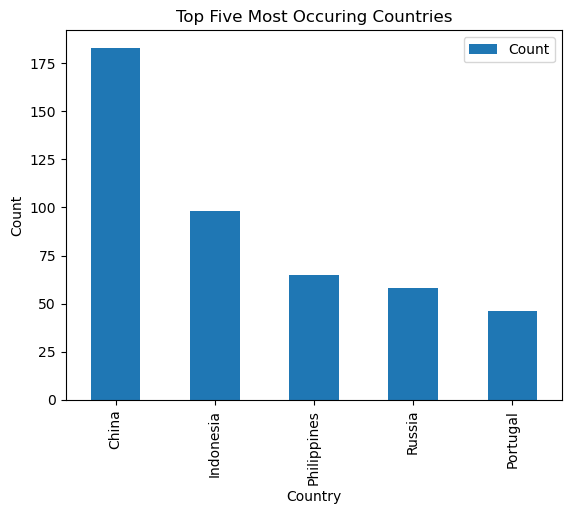

In [10]:
#First let's make things slightly easier and make a dataframe with the top five most occuring countries in our dataset. 
#To make this dataframe, we name it and than use a = 
top_countries = df.value_counts("country").head(5).reset_index()
#Here we learn a valuable lesson and must account for a couple things! First we leverage the .rest_index(), which  helps 
# us to turn the resulting value_counts() into a dataframe that we can then rename/name the columns of. This is important 
#as without taking these steps for this particular process we most likely would be met with an error. Here we can see 
#also leverage useful technology such as OpenAI's ChatGPT or other documentation to troubleshoot issues. This was
#a common occurence and has been done so here! Additionally this is useful as while .plot leverages pandas 
#other packages such as seaborn are made asier by this beforehand work as the delineation of the columns is a key enhancement.
#Let's now name the columns of our created dataframe using the .columns() method!
top_countries.columns = ["Country", "Count"]
#Now let's plot this using .plot!
top_countries.plot(x = "Country", y = "Count", kind = "bar")
#While we now have a visualization, best practice reminds us that adding a title, axis names, and even legends, are necessary. 
#We could add this in the above line, or we can do so now to fill in the missing information!
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top Five Most Occuring Countries")
plt.show()

Let's now do this in Seaborn, another visualization package!
Our utlization of our dataframe will be very similar in theory, however differ in syntax. 

[Text(0.5, 1.0, 'Top Five Most Occuring Countries')]

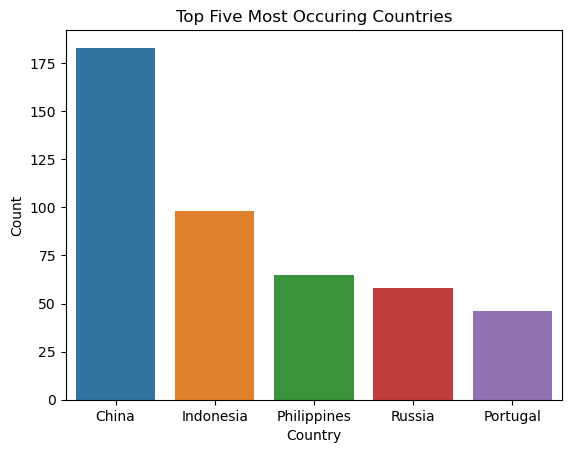

In [11]:
#Seaborn Plot
sns.barplot(x="Country", y = "Count", data = top_countries).set(title = "Top Five Most Occuring Countries")
#Here for information such as a title, we technically could use plt.____ for labels, however we can also do the above for a title 
#Again, documentation and troubleshooting resources can be extremely useful for these smaller details!


### Recipe 3: To CSV: A useful recipe to always have!:

Let's now shift our focus to a useful method which converts/exports a DataFrame into CSV data. This can be extremely useful when working with data from different sources to get things into a more preferrable format! Additionally say you want to isolate a column or columns, this function is incredibly useful!

In [12]:
#Let's convert our top_countries dataframe into a CSV to send to a friend!
top_countries.to_csv("top_countries.csv")
#This will export the datframe into our communal folder following the directory pathway of this notebook. 

## Two Star

Recipes in this section will build in complexity in comparison to there "One Star" counterparts. Recipes in this section will provide useful techniques for data analysis after the initial building and creation of infrastructure for a project.  

### Recipe 4: GroupBy (Myriad of Examples)!

Now that we have a bit more understanding of our dataset let's add some complexity to some of our work! Lets now leverage pandas groupby method. The groupby method functions in the way it sebsets into groups within a column and then we can utilizes a measure! Here's an example: df.groupby("variable")[column].statmeasure()
This might seem a little abstract right now, but the following examples will start to make things a bit clearer! Let's now return to our dataset from before!

In [13]:
#We already know in this case that China is the country that occurs the most in this dataset. 
#Let's look at the races per country, countging per country, then sorting this, filtering to the top five similar
#to before. Unexpectedly, we again see some of the demagraphics of China at the top. This isn't surprising due to higher conglomerations of people. This time we get a bit more indivudal
#detail about the country! We also now introdouce the .sort_values() method, which allows us to sort our results!
df.groupby("country")["race"].value_counts().sort_values(ascending=False).head(10)


country  race                     
China    Cambodian                    8
         Alaska Native                6
         Chickasaw                    5
         Bangladeshi                  5
         Black or African American    5
         Filipino                     5
         Hmong                        5
         Chilean                      4
         Paiute                       4
         Eskimo                       4
Name: race, dtype: int64

In [14]:
#Say we wanted to groupby with an additional factor in this case we now incorporate gender! Again we acknowledge that the sort_values means 
#we aren't looking at per country, but at the breakdown of the most cases within our specified parameters!
df.groupby(["country", "race"])["gender"].value_counts().sort_values(ascending=False) 

country    race           gender
China      Cambodian      Female    4
                          Male      4
           Alaska Native  Female    4
           Hmong          Male      3
Indonesia  Taiwanese      Female    3
                                   ..
Greece     Cheyenne       Female    1
           Chickasaw      Female    1
           Chinese        Female    1
           Chippewa       Female    1
Zimbabwe   Costa Rican    Female    1
Name: gender, Length: 894, dtype: int64

These cases only break the surface of the depth that groupby and its partner method .pviot_table() can do! For greater understanding of the power of the pandas groupby method, consult here: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html]

### Recipe 5: Joining Dataframes!

Let's now join to datframes together! First let's create a new dataframe by first introducing another mock dataset!

In [15]:
df_2 = pd.read_csv("MOCK_DATA_2.csv")
#Similar to before let's examine our dataset!
df_2.head(10)

,id,car,color
0,1,Ford,Teal
1,2,Lamborghini,Goldenrod
2,3,Jaguar,Red
3,4,Chevrolet,Turquoise
4,5,Lexus,Indigo
5,6,Volkswagen,Teal
6,7,Land Rover,Blue
7,8,Buick,Crimson
8,9,Chevrolet,Green
9,10,Geo,Indigo


We now see that this dataset contains an id, a car type, and a color. If we remember back to our original dataset, there was a unique ID number as well. With this in, mind we can introduce the idea of an innerjoin of our two datasets.  

In [16]:
#Leveraging merge to do an innerjoin of our datasets.
df_merged = pd.merge(df,df_2, on = "id", how = "inner")
df_merged

,id,first_name,last_name,gender,race,university,country,car,color
0,1,Ruthie,Traves,Female,Bolivian,Universidad Politécnica de El Salvador,El Salvador,Ford,Teal
1,2,Dante,Mohring,Male,Cree,Mamoun Private University for Science and Tech...,Syria,Lamborghini,Goldenrod
2,3,Woody,Riccetti,Male,Cree,Technical University of Opole,Poland,Jaguar,Red
3,4,Kip,Aughton,Male,Panamanian,Universidade de Lisboa,Portugal,Chevrolet,Turquoise
4,5,Tamqrah,Eddie,Female,Apache,Universidad Marcelino Champagnat,Peru,Lexus,Indigo
...,...,...,...,...,...,...,...,...,...
995,996,Felice,Spring,Male,Cheyenne,St.Kliment Ohridski University,Macedonia,Saab,Aquamarine
996,997,Ethel,Catherine,Female,Samoan,Jiangxi Normal University,China,Dodge,Red
997,998,Aluino,Wettern,Male,Shoshone,Dongbei University of Finance And Economics,China,Lincoln,Red
998,999,Ardenia,Barajas,Female,Laotian,St.Kliment Ohridski University,Macedonia,Buick,Aquamarine


This now enables us to glean further information via this combined dataset!
For example what if we wanted to identify how many cars Dodge Cars are in China that are red?
We could answer the following question using simple logical expression like this!

In [17]:
#Answering the above question utilizing AND
red_dodge_china = df_merged[(df_merged["car"] == "Dodge") & (df_merged["country"] == "China") & (df_merged["color"] == "Red")]
red_dodge_china

,id,first_name,last_name,gender,race,university,country,car,color
996,997,Ethel,Catherine,Female,Samoan,Jiangxi Normal University,China,Dodge,Red


### .isin()

This is Great But very selective, say we now would like to open up the make of car even further. We can now utilize the .isin() method along with our AND logic 

In [18]:
#Looking at what is returned if we now include Lincoln, and Ford into our filtering. 
red_filtered_china = df_merged[df_merged["car"].isin(["Dodge", "Lincoln", "Ford"]) & (df_merged["country"] == "China") & (df_merged["color"] == "Red")]
red_filtered_china

,id,first_name,last_name,gender,race,university,country,car,color
42,43,Arlene,Normanvell,Female,Melanesian,Zhengzhou Grain University,China,Lincoln,Red
996,997,Ethel,Catherine,Female,Samoan,Jiangxi Normal University,China,Dodge,Red
997,998,Aluino,Wettern,Male,Shoshone,Dongbei University of Finance And Economics,China,Lincoln,Red


The isin() method is great as it presents a convenient way to filter a dataframe!

## Three Star
Containing a plethora of various data science techniques, the "Three Star" rating includes various different recipes to build a holistic and interesting project. 

We now shift from our previous datasources to recipes that are not reliant upon our existing datasets!

### Recipe 6: Web-scraping!
Before delving too far, we must first reinforce the ethical considerations and implications of web-scraping. Before doing so it is adviseable to ask oneself the following questions: Does this do harm? Issues of respect? Does this invade or corrupt privacy? Issue of transparency? Is this intellectual property? Does this violate terms of service?

These questions may not be easy to answer, and this is not an exhaustive list either. Taking the time to answer these questions and thinking further, aligns with best practice, and also ensures safety across parties. Thoughtfulness is extremely important in this act. 

With this in mind: Let's scrape one of the many datasets off of a website called [https://www.scrapethissite.com]. This website gives us fairly example content to glean in a safe manner. 

In [19]:
# Create a variable called URL
url = "https://www.scrapethissite.com/pages/forms/"
# Use requests.get to grab the html
my_html = requests.get(url)
#Turn the html into soup using BeautifulSoup
soup = BeautifulSoup(my_html.text, 'html')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robot

In [20]:
#Creation of dataframe for scraped content. 
column_names = {"Team":[], "Year": [], "Wins": [], "Losses": []}
df_nhl = pd.DataFrame(column_names)

In [21]:
#Let's now iterate through to strip for team name, the season year, and the team's wins and losses on the year.
#The find_all method locates all elements of the specified class. 
team = soup.find_all('td', class_= 'name')
year = soup.find_all('td', class_='year')
wins = soup.find_all('td', class_= 'wins')
losses = soup.find_all('td', class_='losses')
#Iterate over extracting each corresponding value mentioned above.
for i in range(len(team)):
    team_name = team[i].text.strip()
    year_szn = year[i].text.strip()
    wins_szn = wins[i].text.strip()
    losses_szn = losses[i].text.strip()
    df_nhl.loc[len(df_nhl.index)] = [team_name, year_szn, wins_szn, losses_szn]
#We could also do similarly with Zip, however as we can see the lists are all the same in length we can reference a forloop such as above.    
#for team, year, wins, losses in zip(team, year, wins, losses): 
#    team_name = team.text.strip()
#    year_szn = year.text.strip()
#    wins_szn = wins.text.strip()
#    losses_szn = losses.text.strip()
#    df.loc[len(df.index)] = [team_name, year_szn, wins_szn, losses_szn]
# Project 9 leveraged this methodology. Additionally, these present workarounds and case studies 
#for some issues had on Project 7 when it came to class observing and web-page elements. 

In [22]:
df_nhl.head()

,Team,Year,Wins,Losses
0,Boston Bruins,1990,44,24
1,Buffalo Sabres,1990,31,30
2,Calgary Flames,1990,46,26
3,Chicago Blackhawks,1990,49,23
4,Detroit Red Wings,1990,34,38


Wow! We could now do further analysis say creating a win percentage column!
While creation of a column isn't a complex skill per say, for our recipe book we will this can be a metaphor for the beautiful garnish on a dish that actually serves purpose! This meaning, its an important skill to possess! We can create a column in the following manner:

In [23]:
#After running the below code we see there is an error due to data as a string! 
#df_nhl["Win %"] = df_nhl["Wins"]/ (df_nhl["Wins"] + df_nhl["Losses"])*100
#Let's troubleshoot this by converting a couple columns to integers! To do so we must use the .astype() function.
df_nhl["Wins"] = df_nhl["Wins"].astype(int)
df_nhl["Losses"] = df_nhl["Losses"].astype(int)

### .astype() 
The method utilized above while not a three star graded recipe, is a useful technique to keep! This is a useful tool to have in your arsenal. 

In [24]:
#After these adjustments we can now return to this column creation!
df_nhl["Win %"] = df_nhl["Wins"] / (df_nhl["Wins"] + df_nhl["Losses"]) * 100
#Viewing our Work
df_nhl

,Team,Year,Wins,Losses,Win %
0,Boston Bruins,1990,44,24,64.705882
1,Buffalo Sabres,1990,31,30,50.819672
2,Calgary Flames,1990,46,26,63.888889
3,Chicago Blackhawks,1990,49,23,68.055556
4,Detroit Red Wings,1990,34,38,47.222222
5,Edmonton Oilers,1990,37,37,50.000000
6,Hartford Whalers,1990,31,38,44.927536
7,Los Angeles Kings,1990,46,24,65.714286
8,Minnesota North Stars,1990,27,39,40.909091
9,Montreal Canadiens,1990,39,30,56.521739


To roundout this recipe, lets leverage our newly created column and see what the best and worst win %'s were. To do so we can utilize the .max() and .min() methods!

In [25]:
#Best Win Percentage
df_nhl["Win %"].max()

68.11594202898551

In [26]:
#To See All the Information for that year we can do so via this:
df_nhl[df_nhl["Win %"] == df_nhl["Win %"].max()]

,Team,Year,Wins,Losses,Win %
16,St. Louis Blues,1990,47,22,68.115942


We now see the St.Louis Blues had the best Win % in a season from the page we scraped. 

In [27]:
#Worst Win Percentage
df_nhl["Win %"].min()

24.242424242424242

In [28]:
#Just like before, to see all the Information for that year we can do so via this:
df_nhl[df_nhl["Win %"] == df_nhl["Win %"].min()]

,Team,Year,Wins,Losses,Win %
15,Quebec Nordiques,1990,16,50,24.242424


We now see the Quebec Nordiques had the worst Win % in a season from the page we scraped. 

While this recipe isn't an exhaustive list of everything covered in our Data Science course this semester, hopefully it can serve as a source more a myrdiad of projects, troubleshooting solutions, and general fun read for whomever may be reading! 

Here's a couple other cool things to learn and stay up to date on:
    API Integration!
    Different types of Visualization tools!
    SQl!
Part of being a modern data scientist is remaining hungry to learn, hopefully these receipes are satiating and leave you wanting more!